In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('timeuse.csv')

First, I made the dates datetimes—now I realize I should have done it while reading the csv.

In [14]:
import dateutil.parser

In [17]:
def string_time(str):
    return dateutil.parser.parse(str)

In [18]:
df['FormattedStartTime'] = df['StartTime'].apply(string_time)

In [19]:
type(df['FormattedStartTime'][0])

pandas.tslib.Timestamp

In [20]:
df.head()

,Country,StartTime,Work and study,Travel to/from work/study,Household work,Sleep and other personal care,Eating,Freetime,TV and video,Unspecified time,FormattedStartTime
0,Belgium,4:00,1.04,0.07,0.16,97.16,0.15,1.01,0.17,0.24,2016-07-25 04:00:00
1,Belgium,4:10,1.09,0.09,0.28,97.14,0.18,0.85,0.14,0.23,2016-07-25 04:10:00
2,Belgium,4:20,1.09,0.15,0.18,96.94,0.40,0.81,0.17,0.25,2016-07-25 04:20:00
3,Belgium,4:30,1.13,0.35,0.23,96.51,0.27,1.09,0.17,0.27,2016-07-25 04:30:00
4,Belgium,4:40,1.23,0.34,0.36,96.46,0.20,0.97,0.15,0.29,2016-07-25 04:40:00


In [51]:
df.columns

Index(['Country', 'StartTime', 'Work and study', 'Travel to/from work/study',
       'Household work', 'Sleep and other personal care', 'Eating', 'Freetime',
       'TV and video', 'Unspecified time', 'FormattedStartTime'],
      dtype='object')

In [29]:
df[df['Country'] == 'Finland'].sort_values('Eating', ascending = False).head()

,Country,StartTime,Work and study,Travel to/from work/study,Household work,Sleep and other personal care,Eating,Freetime,TV and video,Unspecified time
331,Finland,11:10,26.45,0.49,27.98,5.44,15.26,20.96,2.31,1.10
332,Finland,11:20,26.45,0.65,27.94,4.80,14.44,22.13,2.45,1.15
330,Finland,11:00,27.31,0.49,28.77,5.76,13.61,20.45,2.18,1.43
334,Finland,11:40,27.98,0.54,27.70,4.71,13.16,21.98,2.52,1.41
336,Finland,12:00,28.71,0.69,27.44,4.37,12.94,21.90,2.53,1.42


In [22]:
df['FormattedStartTime'].describe()

count                    2160
unique                    144
top       2016-07-25 00:00:00
freq                       15
first     2016-07-25 00:00:00
last      2016-07-25 23:50:00
Name: FormattedStartTime, dtype: object

In [21]:
b = df[df['Country'] == 'Belgium'][['Eating', 'FormattedStartTime']]
b = b.set_index('FormattedStartTime')
print(b[:25])
# b.plot(b['FormattedStartTime'], b['Eating'])

                     Eating
FormattedStartTime         
2016-07-25 04:00:00    0.15
2016-07-25 04:10:00    0.18
2016-07-25 04:20:00    0.40
2016-07-25 04:30:00    0.27
2016-07-25 04:40:00    0.20
2016-07-25 04:50:00    0.49
2016-07-25 05:00:00    0.49
2016-07-25 05:10:00    0.61
2016-07-25 05:20:00    0.65
2016-07-25 05:30:00    0.77
2016-07-25 05:40:00    0.74
2016-07-25 05:50:00    0.98
2016-07-25 06:00:00    1.00
2016-07-25 06:10:00    1.81
2016-07-25 06:20:00    2.33
2016-07-25 06:30:00    3.08
2016-07-25 06:40:00    3.39
2016-07-25 06:50:00    4.10
2016-07-25 07:00:00    5.77
2016-07-25 07:10:00    7.35
2016-07-25 07:20:00    7.84
2016-07-25 07:30:00    8.63
2016-07-25 07:40:00    8.74
2016-07-25 07:50:00    9.65
2016-07-25 08:00:00   10.23


# Adding Some Data:
I took a look at the work week, weather, and coordinates.
* work week: http://stats.oecd.org/Index.aspx?DataSetCode=ANHRS (for Bulagria: http://sofiaglobe.com/2012/10/05/working-hours-in-bulgaria-slightly-above-eu-average/). These numbers will be for 2011. 
* weather: http://www.weatherbase.com/weather/country.php3?r=EUR
* coordinates: Google
    'Norway', 33.6, 60.4720, 8.4689
    'Germany', 34.6, 51.1657, 10.4515
    'Belgium', 35.1, 50.5039, 4.4699
    'Sweden', 35.8, 60.1282, 18.6435
    'Italy', 36.0, 41.8719, 12.5674
    'United Kingdom', 36.1, 55.3781, -3.4360
    'Finland', 36.5, 61.9241, 25.7482
    'France', 36.6, 46.2276, 2.2137
    'Spain', 37.2, 40.4637, -3.7492
    'Lithuania', 38.1, 55.1694, 23.8813
    'Estonia', 38.7, 58.5953, 25.0136
    'Latvia', 38.8, 56.8796, 24.6032
    'Slovenia', 39.2, 46.1512, 14.9955
    'Poland', 39.7, 51.9194, 19.1451
    'Bulgaria', 40.9, 42.7339, 25.4858
I just copy and pasted these by hand into a csv file.

In [4]:
c_df = pd.read_csv('hours_coordinates.csv')

After playing around, I found the most interesting results with temperature.

In [12]:
temp = []
for x in c_df.sort_values('hitemp', ascending=False)['country']:
    temp.append(x)
temp

['Spain',
 'Italy',
 'France',
 'Bulgaria',
 'Poland',
 'Belgium',
 'United Kingdom',
 'Germany',
 'Slovenia',
 'Lithuania',
 'Latvia',
 'Estonia',
 'Sweden',
 'Norway',
 'Finland']

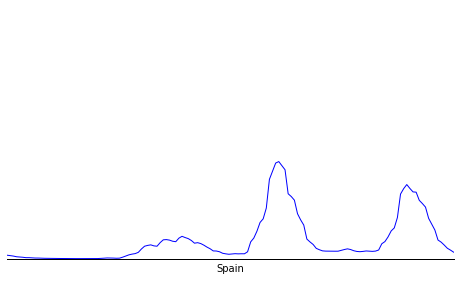

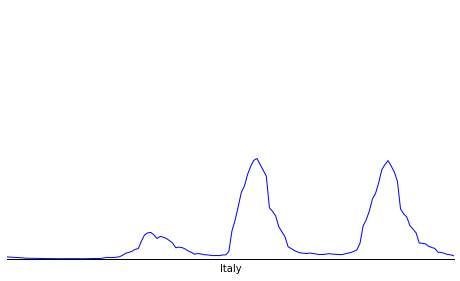

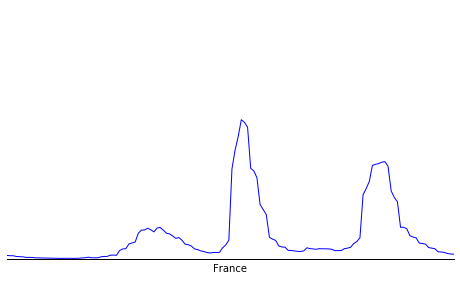

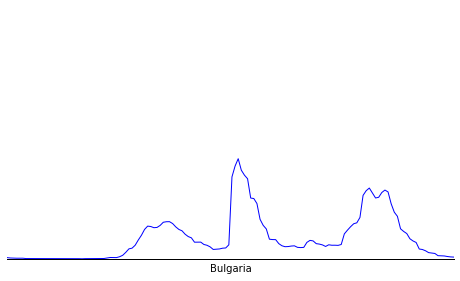

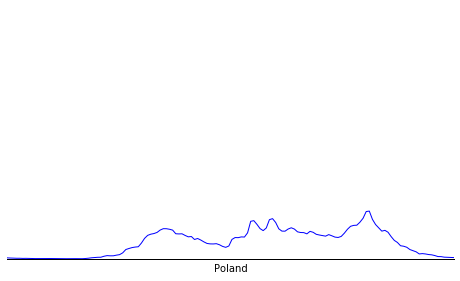

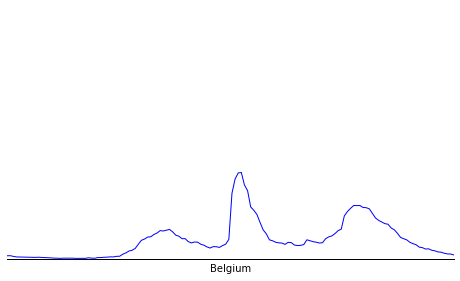

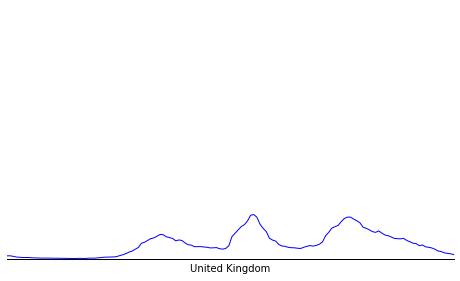

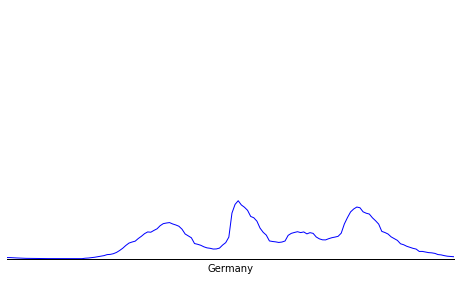

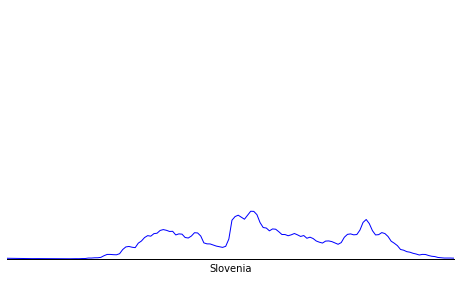

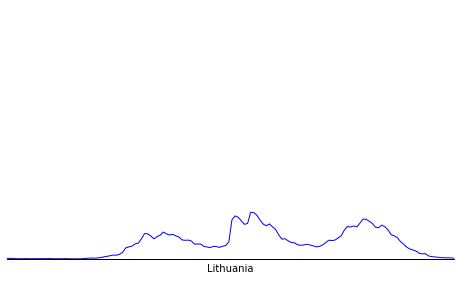

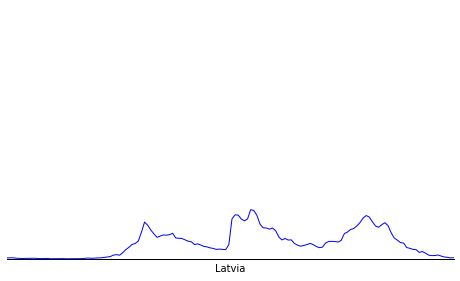

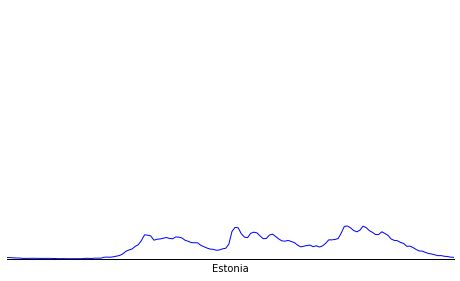

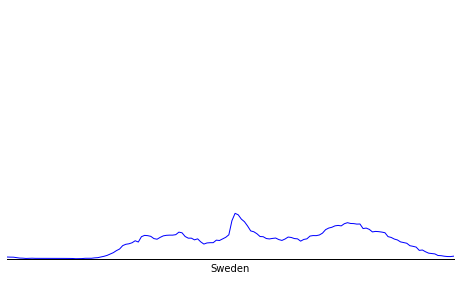

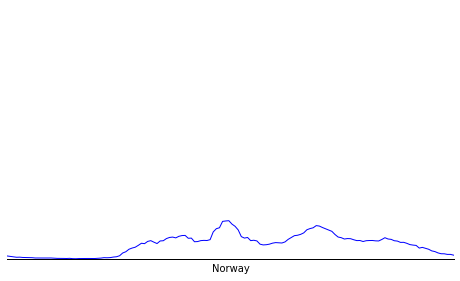

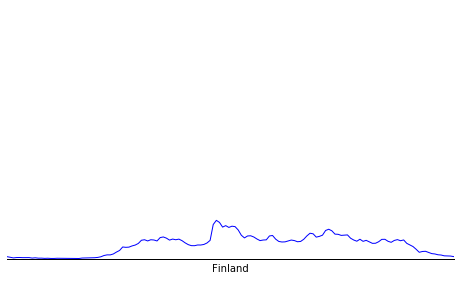

In [64]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
num = 0
for country in temp:
    num += 1
    b = df[df['Country'] == country][['Eating', 'FormattedStartTime']]
    b = b.set_index('FormattedStartTime')
    fig, ax = plt.subplots(figsize=(8, 5))
    b.plot(linewidth = 1, ax = ax, legend = False)
    ax.set_ylim([0, 100])
    ax.set_yticklabels('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.tick_params(
        which = 'major',
        top = 'off',
        bottom = 'off',
        left = 'off',
        right = 'off',
        labeltop = 'off',
        labelbottom = 'off'
        )
    plt.tick_params(
        which = 'minor',
        top = 'off',
        bottom = 'off',
        left = 'off',
        right = 'off',
        labeltop = 'off',
        labelbottom = 'off'
        )
    ax.set_xlabel(country)
    plt.savefig(str(num)+country+'.pdf', transparent = True, bbox_inches='tight')

Then I played around to find out how much I should shade in each country's graph in Illustrator:

In [22]:
c_df['percent_temp'] = (c_df['hitemp']-43.9) / 25.4 * 100 # 69.3-43.9

In [23]:
c_df['percent_shading'] = (c_df['hitemp']-35) / 34.5 * 100 # 69.3-43.9

In [24]:
c_df.sort_values('hitemp', ascending=False)[['country', 'hitemp', 'percent_temp', 'percent_shading']]

,country,hitemp,percent_temp,percent_shading
8,Spain,69.3,100.000000,99.420290
4,Italy,63.8,78.346457,83.478261
7,France,60.5,65.354331,73.913043
14,Bulgaria,59.3,60.629921,70.434783
13,Poland,56.2,48.425197,61.449275
2,Belgium,55.5,45.669291,59.420290
5,United Kingdom,55.3,44.881890,58.840580
1,Germany,54.0,39.763780,55.072464
12,Slovenia,53.8,38.976378,54.492754
9,Lithuania,49.6,22.440945,42.318841
